## Find  the relation between

The Stable Rank (in log units) and the Power Law exponent (we fit) $\alpha$

$$\dfrac{\log_{10}\Vert W\Vert^{2}}{\log_{10}\lambda_{max}}\;\;\;vs\;\;\alpha$$

We do this by 

- generating a random ($N\times M$) Pareto matrix $\mathbf{W}(\mu)$ for $\mu\in[1,5]$

- computing the correlation matrix $\mathbf{X}$ and its eigenvalues $\lambda_{i}$

- fitting the density  to a power law: $\rho(\lambda)\sim\dfrac{1}{\lambda^{\alpha}}$

where $Q=N/M1=1$ and we normalize $\mathbf{X}$ by $1/N$

$$\mathbf{X}=\dfrac{1}{N}\mathbf{W}^{T}\mathbf{W}$$



#### We also examine other normalizations

- $\dfrac{1}{N^{2/\mu}}\mathbf{X}$

- $\dfrac{1}{N^{1/\mu}}\mathbf{W}$

- $\dfrac{1}{\max|\mathbf{W}|}\mathbf{W}$

In [1]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

import powerlaw

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
mus = [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4, 4.5, 5]
Ms = [100, 500, 1000, 5000, 10000]
Mcolors=['blue','green', 'teal', 'purple', 'red']


#### also create table for paper here

In [ ]:
from IPython.core.display import display, HTML
html = '<table><tr><th>mu</th><th>alpha</th><th>logNorm</th><th>formula</th><th>ratio</th></tr>'
Mresults = {}
l_maxs = {}
logNorm2s = {}

for M in Ms:
    ratios, alphas = [], []
    l_maxs[M] = []
    logNorm2s[M] = []
    
    N = M
    for mu in tqdm(mus):

        # NO W NORMALIZATION 
        W = np.random.pareto(a=mu,size=(N,M))
        normW = np.linalg.norm(W)
        logNorm2 = 2.0*np.log10(normW)
        logNorm2s[M].append(logNorm2)

        # STANDARD NORMALIZATION 
        X=np.dot(W.T,W)/N
        evals = np.linalg.eigvals(X)

        l_max, l_min = np.max(evals), np.min(evals)
        fit =  powerlaw.Fit(evals)

        a = fit.alpha
        alphas.append(a)

        ratio = logNorm2/np.log10(l_max)
        ratios.append(ratio)

        Mresults[M]=[ratios,alphas]
        
        l_maxs[M].append(l_max)

            #print("mu= {} 1+mu/2 = {}, alpha= {:2f} logNorm2= {:2f}  formula= {:2f} ratio= {:2f}"
            #      .format(mu,(1+mu/2),fit.alpha, logNorm2, formula, ratio ))

    #html += "<tr><td>{:.3f}</td><td>{:.3f}</td><td>{:.3f}</td><td>{:.3f}</td><td>{:.3f}</td></tr>".format(mu, fit.alpha, logNorm2, formula, ratio)

#html += "</table>"
#display(HTML(html))

Calculating best minimal value for power law fit
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Calculating best minimal value for power law fit


Calculating best minimal value for power law fit
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1141: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1160: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:701: RuntimeWarning: overflow encountered in double_scalars
  )[1:]
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculati

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


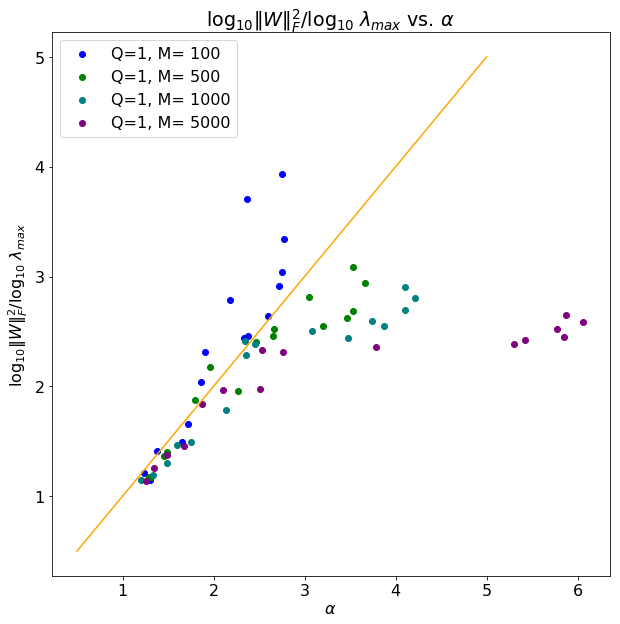

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$\log_{10}\Vert W\Vert_{F}^{2} / \log_{10}\;\lambda_{max}$ vs. $\alpha\;$")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log_{10}\Vert W\Vert_{F}^{2} / \log_{10}\;\lambda_{max}$")

for im, M in enumerate(Ms):
    [ratios,alphas] = Mresults[M]
    plt.scatter(alphas, ratios, label="Q=1, M= {}".format(M), color=Mcolors[im])

plt.plot(mus, mus,  color='orange')
plt.legend()
#plt.savefig("img/Alpha-LogNorm-Relations.png")

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$\log_{10}\Vert W\Vert_{F}^{2} / \log_{10}\;\lambda_{max}$ vs. $\alpha\;$")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log_{10}\Vert W\Vert_{F}^{2} / \log_{10}\;\lambda_{max}$")

M=1000
im=4
[ratios,alphas] = Mresults[M]
plt.scatter(alphas, ratios, label="Q=1, M= {}".format(M), color=Mcolors[im])

plt.plot(mus, mus,  color='orange')
plt.legend()
#plt.savefig("img/Alpha-LogNorm-M1000.png")

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$\log\Vert W\Vert_{F}^{2} $ vs. $\alpha\;$")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log\Vert W\Vert_{F}^{2}$")

for im, M in enumerate(Ms):
    [ratios,alphas] = Mresults[M]
    plt.scatter(alphas, logNorm2s[M], label="Q=1, M= {}".format(M), color=Mcolors[im])
    
plt.legend()

## Heavy Tailed  normalization on X

$$\dfrac{1}{N^{2/\mu}}X$$

In [ ]:
Mresults = {}
l_maxs = {}
logNorm2s = {}

for M in Ms:
    ratios, alphas = [], []
    l_maxs[M] = []
    logNorm2s[M] = []
    
    N = M
    for mu in tqdm(mus):

        W = np.random.pareto(a=mu,size=(N,M))
        normW = np.linalg.norm(W)
        logNorm2 = 2.0*np.log10(normW)
        logNorm2s[M].append(logNorm2)

        # CHANGED NORMALIZATION HERE
        X=np.dot(W.T,W)/N**(2/mu)
        evals = np.linalg.eigvals(X)

        l_max, l_min = np.max(evals), np.min(evals)
        fit =  powerlaw.Fit(evals)

        a = fit.alpha
        alphas.append(a)

        ratio = logNorm2/np.log10(l_max)
        ratios.append(ratio)

        Mresults[M]=[ratios,alphas]
        
        l_maxs[M].append(l_max)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$\log\Vert W\Vert_{F}^{2} / \log\;\tilde{\lambda}_{max}$ vs. $\mu;$"+"\n"+r"$(1/N^{2/\mu})\mathbf{X}$ normalization")
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\log\Vert W\Vert_{F}^{2} / \log\;\tilde{\lambda}_{max}$")

for im, M in enumerate(Ms):
    [ratios,alphas] = Mresults[M]
    plt.scatter(mus, ratios, label="Q=1, M= {}".format(M), color=Mcolors[im])

plt.legend()
#plt.xlim(1,2)
plt.ylim(0,5)

plt.savefig("img/LogNorm-Lmax-Scaled.png")

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$\log\Vert W\Vert_{F}^{2} $ vs. $\alpha\;$"+"\n"+r"$1/N^{2/\mu}$ X normalization")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log\Vert W\Vert_{F}^{2}$")

for im, M in enumerate(Ms):
    [ratios,alphas] = Mresults[M]
    plt.scatter(alphas, logNorm2s[M], label="Q=1, M= {}".format(M), color=Mcolors[im])
    
plt.legend()

## Max Value  normalization on W

$$\dfrac{1}{N^{1/\mu}}\mathbf{W},\;\;\;\dfrac{1}{N}\mathbf{X}$$

In [ ]:
Mresults = {}
l_maxs = {}
logNorm2s = {}

for M in Ms:
    ratios, alphas = [], []
    l_maxs[M] = []
    logNorm2s[M] = []
    
    N = M
    for mu in tqdm(mus):

        # CHANGED NORMALIZATION HERE
        W = np.random.pareto(a=mu,size=(N,M))
        W = W/N**(1/mu)
        
        normW = np.linalg.norm(W)
        logNorm2 = 2.0*np.log10(normW)
        logNorm2s[M].append(logNorm2)

        # STANDARD NORMALIZATION HERE
        X=np.dot(W.T,W)/N
        evals = np.linalg.eigvals(X)

        l_max, l_min = np.max(evals), np.min(evals)
        fit =  powerlaw.Fit(evals)

        a = fit.alpha
        alphas.append(a)

        ratio = logNorm2/np.log10(l_max)
        ratios.append(ratio)

        Mresults[M]=[ratios,alphas]
        
        l_maxs[M].append(l_max)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$\log\Vert W\Vert_{F}^{2} / \log\;\lambda_{max}$ vs. $\alpha\;$"+"\n"+r"$(1/N^{1/\mu})\mathbf{W}$ normalization")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log\Vert W\Vert_{F}^{2} / \log\;\lambda_{max}$")

for im, M in enumerate(Ms):
    [ratios,alphas] = Mresults[M]
    plt.scatter(alphas, ratios, label="Q=1, M= {}".format(M), color=Mcolors[im])

plt.ylim([-1,100])
plt.legend()

In [ ]:
np.log10(np.array(l_maxs[500]))

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$\log\Vert W\Vert_{F}^{2} $ vs. $\alpha\;$"+"\n"+r"$\dfrac{1}{N^{1/\mu}}$ W normalization")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log\Vert W\Vert_{F}^{2}$")

for im, M in enumerate(Ms):
    [ratios,alphas] = Mresults[M]
    plt.scatter(alphas, logNorm2s[M], label="Q=1, M= {}".format(M), color=Mcolors[im])
    
plt.plot(mus, mus,  color='orange')
plt.legend()


## Max Value  normalization on W

$$\dfrac{\mathbf{W}}{\max|\mathbf{W}|},\;\;\;\dfrac{1}{N}\mathbf{X}$$

In [ ]:
Mresults = {}
l_maxs = {}
logNorm2s = {}
             
for M in Ms:
    ratios, alphas = [], []
    l_maxs[M] = []
    logNorm2s[M] = []
    
    N = M
    for mu in tqdm(mus):

        # CHANGED NORMALIZATION HERE
        W = np.random.pareto(a=mu,size=(N,M))
        W = W/np.max(W)
        
        normW = np.linalg.norm(W)
        logNorm2 = 2.0*np.log10(normW)
        logNorm2s[M].append(logNorm2)

        X=np.dot(W.T,W)/N
        evals = np.linalg.eigvals(X)

        l_max, l_min = np.max(evals), np.min(evals)
        fit =  powerlaw.Fit(evals)

        a = fit.alpha
        alphas.append(a)

        ratio = logNorm2/np.log10(l_max)
        ratios.append(ratio)

        Mresults[M]=[ratios,alphas]
        
        l_maxs[M].append(l_max)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$\log\Vert W\Vert_{F}^{2} $ vs. $\alpha\;$"+"\n"+r"W/max|W| normalization")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log\Vert W\Vert_{F}^{2}$")

for im, M in enumerate(Ms):
    [ratios,alphas] = Mresults[M]
    aa = np.array(alphas)[0:14]
    ln2 = np.array(logNorm2s[M])[0:14]
    plt.scatter(aa, ln2, label="Q=1, M= {}".format(M), color=Mcolors[im])
    
#plt.plot(mus, mus,  color='orange')
plt.legend()



In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$\log_{10}\;\lambda_{max} $ vs. $\alpha\;$"+"\n"+r"W/max |W| normalization")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\log_{10}\;\lambda_{max}$")


for im, M in enumerate(Ms):
    [ratios,alphas] = Mresults[M]
    aa = np.array(alphas)[0:15]
    llm = np.log10(l_maxs[M])[0:15]
    plt.scatter(aa, llm, label="Q=1, M= {}".format(M),  color=Mcolors[im])
    

#plt.plot(mus, mus,  color='orange')
plt.legend()

